**Autores**: Paulo Sérgio Galdino de Souza e Rafael do Nascimento Moura


**Estatística e probabilidade, 2021.2** 

**Classificador Ingênuo de Bayes**



O classificador multinomial Naïve Bayes é um dos modelos mais populares no aprendizado de máquina. Tomando como premissa a suposição de independência entre as variáveis do problema, o modelo de Naïve Bayes realiza uma classificação probabilística de observações, caracterizando-as em classes pré-definidas. A base dados utilizada no nosso classificador se trata de dados da pesquisa anual do Centers  for Disease Control and Prevention (Um sistema de saúde dos estados Unidos) de 2020 de  aproximadamente 400 mil adultos relacionados ao seu estado de saúde. As informações extraídas da base de dados foram retiradas da comunidade on-line de cientista de dados chamada Kaggle, e pode ser encontrada por: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease. 

O principal objetivo ao aplicar a técnica  de aprendizagem de máquina (Naive Bayes), no nosso projeto, é tornar possível o mapeamento de um paciente aleatório dado uma série de parâmetros que irão prever se o indivíduo em questão é suscetível a ter uma enfermidade cardiovascular ou não. 

Serão utilizados 16 parâmetros para o mapeamento, sendo estes: 


1) **“Tabagismo”** : Você fumou pelo menos 100 cigarros em toda a sua vida?

2) **“Beber álcool”**: Você é um homen adulto que bebe mais de 14 bebidas por semana ou uma mulher adulta que bebe mais de 7 bebidas por semana.

3) **“Derrame”**:  Já teve um derrame?

4) **“Saúde Física”** : Agora, pensando em sua saúde física, que inclui doenças e lesões físicas, por quantos dias nos últimos 30 dias sua saúde física não foi boa? (0-30 dias).

5) **“Saúde Mental”** : Pensando em sua saúde mental, por quantos dias nos últimos 30 dias sua saúde mental não foi boa? (0-30 dias).

6) **“Dificuldade de Locomoção”** : Você tem sérias dificuldades para caminhar ou subir escadas?

7) **“Sexo”**: Você é homem ou mulher?

8)**“Faixa-etária”**: Quatorze categorias de idade com intervalos de quatro anos.

9) **“Raça”**: valor de raça/etnia

10)**“Diabético”**: Você tem diabetes?

11)**“Atividade Física”** : Adultos que relataram fazer atividade física ou exercício durante os últimos 30 dias além de seu trabalho regular.

12) **GenHealth**: Você diria que, em geral, sua saúde é...

13) **“Horas de sono”**: Em média, quantas horas de sono você dorme em um período de 24 horas?

14) **“Asma”**: Você tem asma?

15) **“Doença renal”**: Não incluindo cálculos renais, infecção da bexiga ou incontinência, você já foi informado de que tinha doença renal?

16) **“SkinCancer”**: Você já teve ou tem câncer de pele?

OBS: Antes de tudo, é necessário ter o arquivo .csv da base de dados e importa-lo, esá disponibilizado em: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease. 

-
-


Dado o exposto, os trechos de códigos a seguir se tratam da implementação do nosso classificador.









Bibliotecas a serem utilizadas:

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.naive_bayes import GaussianNB


Acesso ao arquivo .csv que contém as informações  da base de dados:

In [ ]:
#np.set_printoptions(threshold=sys.maxsize)
basedados=pd.read_csv('/content/heart_2020_cleaned.csv')

Base de dados a ser utilizada:

In [ ]:
basedados 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186544,No,22.81,No,No,No,0.0,0.0,No,Female,65-69,White,No,Yes,Excellent,6.0,No,No,No
186545,No,20.53,Yes,No,No,1.0,0.0,No,Female,55-59,White,No,Yes,Excellent,7.0,No,No,No
186546,No,20.12,No,No,No,7.0,30.0,No,Female,30-34,White,No,No,Excellent,7.0,No,No,No
186547,No,24.41,No,No,No,1.0,0.0,No,Male,55-59,White,No,Yes,Very good,7.0,No,No,No


O objetivo deste trecho é agrupar em um array os valores categóricos (informações contidas em cada coluna - apenas dos parâmetros) que serão utilizados para calcular as probabilidades para posteriormente facilitar o mapeamento. 

In [ ]:
X_disease=basedados.iloc[:,2:18].values

Array agrupado com cada parâmetro que será utilizado:

In [ ]:
X_disease #values 

array([['Yes', 'No', 'No', ..., 'Yes', 'No', 'Yes'],
       ['No', 'No', 'Yes', ..., 'No', 'No', 'No'],
       ['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'],
       ...,
       ['No', 'No', 'No', ..., 'No', 'No', 'No'],
       ['No', 'No', 'No', ..., 'Yes', 'No', 'No'],
       ['No', 'No', 'No', ..., 'Yes', 'No', 'No']], dtype=object)

Neste trecho, será agrupado em um array todos os valores da coluna relativa a o resultado das predições realizadas na pesquisa posta na base de dados.

In [ ]:
Y_disease=basedados.iloc[:, 0].values
Y_disease #target key values

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

Separação de 75% dos dados para treino e 25% dos dados para teste:

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X_disease, Y_disease, test_size = 0.25, random_state = 5)

Como as informações da parte categórica contidas no banco de dados variam entre diversos tipos: strings,booleans,floats e inteiros, será necessário converter todos esses dados em um único tipo, no caso, inteiro. Caso não seja feita a conversão, é possível que erros sejam retornados.

In [ ]:
from sklearn.preprocessing import LabelEncoder #conversao de valores 
#label_encoder_BMI=LabelEncoder()
label_encoder_Smoking=LabelEncoder()
label_encoder_AlcoholDrinking=LabelEncoder()
label_encoder_Stroke=LabelEncoder()
label_encoder_PhysicalHealth=LabelEncoder()
label_encoder_MentalHealth=LabelEncoder()
label_encoder_DiffWalking	=LabelEncoder()
label_encoder_Sex=LabelEncoder()
label_encoder_AgeCategory=LabelEncoder()
label_encoder_Race=LabelEncoder()
label_encoder_Diabetic=LabelEncoder()
label_encoder_PhysicalActivity=LabelEncoder()
label_encoder_GenHealth=LabelEncoder()
label_encoder_SleepTime=LabelEncoder()
label_encoder_Asthma=LabelEncoder()
label_encoder_KidneyDisease=LabelEncoder()
label_encoder_SkinCancer=LabelEncoder()

Neste passo, iremos associar a conversão feita de outros tipos de dados citados anteriormente para o tipo inteiro ao array que contém os atributos categóricos. Cada índice do array corresponde a seus respectivos parâmetros da base de dados.

In [ ]:
#X_disease[:,0]=label_encoder_BMI.fit_transform(X_disease[:,0])
X_disease[:,0]=label_encoder_Smoking.fit_transform(X_disease[:,0])
X_disease[:,1]=label_encoder_AlcoholDrinking.fit_transform(X_disease[:,1])
X_disease[:,2]=label_encoder_Stroke.fit_transform(X_disease[:,2])
X_disease[:,3]=label_encoder_PhysicalHealth.fit_transform(X_disease[:,3])
X_disease[:,4]=label_encoder_MentalHealth.fit_transform(X_disease[:,4])
X_disease[:,5]=label_encoder_DiffWalking.fit_transform(X_disease[:,5])
X_disease[:,6]=label_encoder_Sex.fit_transform(X_disease[:,6])
X_disease[:,7]=label_encoder_AgeCategory.fit_transform(X_disease[:,7])
X_disease[:,8]=label_encoder_Race.fit_transform(X_disease[:,8])
X_disease[:,9]=label_encoder_Diabetic.fit_transform(X_disease[:,9])
X_disease[:,10]=label_encoder_PhysicalActivity.fit_transform(X_disease[:,10])
X_disease[:,11]=label_encoder_GenHealth.fit_transform(X_disease[:,11])
X_disease[:,12]=label_encoder_SleepTime.fit_transform(X_disease[:,12])
X_disease[:,13]=label_encoder_Asthma.fit_transform(X_disease[:,13])
X_disease[:,14]=label_encoder_KidneyDisease.fit_transform(X_disease[:,14])
X_disease[:,15]=label_encoder_SkinCancer.fit_transform(X_disease[:,15])

Após isso, o array com os novos valores convertidos para inteiros dos atributos categóricos será dado por: 

In [ ]:
X_disease #Associacao dos valores apos conversao


array([[1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=object)

É importante frisar, antes de tudo, que após a conversão do tipo de dado  as associações dos parâmetros foram feitas da seguinte maneira:

1) **Smoking**: (Yes=1, No=0) 

2) **Alcohol drinking**: (Yes=1, No=0) 

3) **Stroke**: (Yes=1, No=0)

4) **Physical Health**: (Foi associado para o prórpio valor original, mas em inteiro) 

5) **Mental Health**: (Foi associado para o prórpio valor original, mas em inteiro) 

6) **Diff Walking**: (Yes=1, No=O) 

7) **Sex**:  (Female=0, Male=1)

8) **Age Category** (18-24 ; 25-29; 30-34, 35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older) Os valores da faixa de idade são separados em 4 a 4 anos, de (18 anos até 80 or older). Sendo assim , cada valor foi associado como: (18-24 -> 0 , 25-29 -> 1,30-34 -> 2 ..., 80 or older ->12) 

9) **Race**: (White=5, Black=2, American/Indian/alaskan=0,Asian=1,Hispanic=3,Other=4) 

10) **Diabetic**:  (Yes=2,No=0,Boderline diabetes=1 , Diabetes during pregnancy=3)

11) **PhysicalActivity**: (Yes=1, No = 0)

12) **GenHealth**: (Fair=1, Good=2, Very good=4, Poor=3, Excellent=0)

13) **Sleep Time**:  (Valor original +1)

14) **Asthma**: (Yes=1,No=0)

15) **Kidney Disease**: (No=0, Yes=1)

16) **Skin Cancer**: (Yes=1, No=0)

Ps: ***Lembrando que cada parâmetro corresponde a seus respectivos índices no vetor X_disease. Essas informações serão utilizadas posteriormente para realizar  a predição das classes.***


Nesse momento, iremos utilizar a base de dados, através dos dois arrays(target key e atributos categóricos) e aplicar o classificador ingênuo de Bayes. O tipo de implementação será a Gaussiana, da biblioteca sklearn, justamente porque no caso de uma grande base de dados (como a nossa) a implementação Gaussiana garante melhor acurária nas predições.

In [ ]:
naive_heart_disease=GaussianNB()
naive_heart_disease.fit(X_disease,Y_disease) #aplicando classificador na bd


GaussianNB()

Medição da acurácia do preditor:

In [ ]:
y_pred = naive_heart_disease.predict(X_disease)  

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_disease, y_pred) 

0.847396889790399

Matriz de confusão: 

[[107411  14197]
 [  6116   5386]]


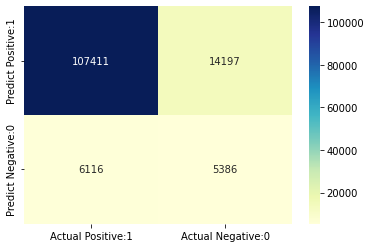

In [ ]:
#Confusion Matrix  

from sklearn.metrics import confusion_matrix  
import seaborn as sns
cm = confusion_matrix(Y_disease, y_pred)  

print(cm)  

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
   index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Geração da tabela de probabilidades:

In [ ]:
y_pred_prob = naive_heart_disease.predict_proba(X_disease)[0:15] #Probabilidade gerada para os 15 primeiros casos, obs a tabela é expansivel, basta alterar a size do array

y_pred_prob

array([[1.24366441e-01, 8.75633559e-01],
       [1.17382395e-04, 9.99882618e-01],
       [7.53048955e-02, 9.24695104e-01],
       [8.61979167e-01, 1.38020833e-01],
       [8.65399746e-01, 1.34600254e-01],
       [3.48079065e-01, 6.51920935e-01],
       [5.55060816e-01, 4.44939184e-01],
       [3.94282206e-02, 9.60571779e-01],
       [9.31914473e-05, 9.99906809e-01],
       [8.72438535e-01, 1.27561465e-01],
       [1.44194527e-06, 9.99998558e-01],
       [9.98479168e-01, 1.52083247e-03],
       [3.99493455e-01, 6.00506545e-01],
       [8.09255093e-01, 1.90744907e-01],
       [3.54395681e-01, 6.45604319e-01]])

Listando classes possíveis para o mapeamento...

In [ ]:
naive_heart_disease.classes_ #classes possíveis

array(['No', 'Yes'], dtype='<U3')

Quantidade de dados mapeados para cada classe...

In [ ]:

naive_heart_disease.class_count_   #qtd dados mapeados em cada classe

array([121608.,  11502.])

Probabilidade intríseca a cada classe...

In [ ]:
naive_heart_disease.class_prior_ #prob nao e sim dado a bd

array([0.91359026, 0.08640974])

Por fim, ao realizar a predição, é necessário compreender que, como dito anteriormente, cada parâmetro, como foi listado nas seções anteriores equivale à seus respectivos valores dado cada posição no array.

In [ ]:
from sklearn.metrics import accuracy_score
atributes=[]
smoking=int(input('Você fumou pelo menos 100 cigarros em toda a sua vida? (Y=1, N=0): '))
atributes.append(smoking)
alcohol=int(input('Você é um homem adulto que bebe mais de 14 bebidas por semana ou uma mulher adulta que bebe mais de 7 bebidas por semana? (Y=1, N=0): '))
atributes.append(alcohol)
stroke=int(input('Já teve um derrame? (Y=1,N=0): '))
atributes.append(stroke)
ph_health=int(input('Pensando em sua saúde física, que inclui doenças e lesões físicas, por quantos dias nos últimos 30 dias sua saúde física não foi boa? (0-30 dias): '))
atributes.append(ph_health)
mental_health=int(input('por quantos dias nos últimos 30 dias sua saúde mental não foi boa? (0-30 dias): '))
atributes.append(mental_health)
diff_walking=int(input('Já teve um derrame? (Y=1,N=0): '))
atributes.append(diff_walking)
sex=int(input('Você é homem ou mulher? (M=0,H=1): '))
atributes.append(sex)
age=int(input('Qual a sua faixa etária? (Considere que 18-24=0 , 25-29=1, 30-34 = 2,...,80+ = 12: '))
atributes.append(age)
race=int(input('Qual sua raça/etnia? (American/Indian/Alaskan=0, Asian=1,Black=2, Hispanic=3, Other=4, White=5): '))
atributes.append(race)
diabetes=int(input('Voce tem diabetes? (No=0,Pre-diabetes=1, Yes=2, Durante a gravidez=3): '))
atributes.append(diabetes)
physical_act=int(input('Nos seus últimos 30 dias, você andou fazendo exercícios? (Y=1,N=0): '))
atributes.append(physical_act)
gen_health=int(input('Você diria que, em geral, sua saúde é... (excelente=0, normal=1, boa=2,ruim=3, muito boa=4): '))
atributes.append(gen_health)
sleep_time=int(input('Em média, quantas horas de sono você dorme em um período de 24 horas?? (0-24h): '))
atributes.append(sleep_time)
asthma=int(input('Você possui asma? (Y=1, N=0): '))
atributes.append(asthma)
kidney_dis=int(input('Não incluindo cálculos renais, infecção da bexiga ou incontinência, você já foi informado de que tinha doença renal? (Y=1, N=0): '))
atributes.append(kidney_dis)
skin_cancer=int(input('Você possui ou já teve cancer de pele? (Y=1, N=0) : '))
atributes.append(skin_cancer)



prediction=naive_heart_disease.predict([atributes])

prediction




array(['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes'],
      dtype='<U3')